In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import torch
import numpy as np
import segmentation_models_pytorch as smp

from scripts.plotting import show_images
from scripts.preprocessing import RoadDataset, split_data
from torch.utils.data import DataLoader
from torchvision.transforms import v2

import matplotlib
import matplotlib.pyplot as plt

import albumentations as A

In [3]:
ROOT_PATH = os.path.normpath(os.getcwd() + os.sep + os.pardir)
train_directory = os.path.join(ROOT_PATH, 'data', 'raw', 'training')
image_path_train, image_path_test, mask_path_train, mask_path_test = split_data(train_directory, 0.2)

# Testing Transformations

List of possible transformations: https://albumentations.ai/docs/getting_started/transforms_and_targets/


Note that since our source images are float32 between [0,1], some effects might need to be manually scaled to reasonable strength.

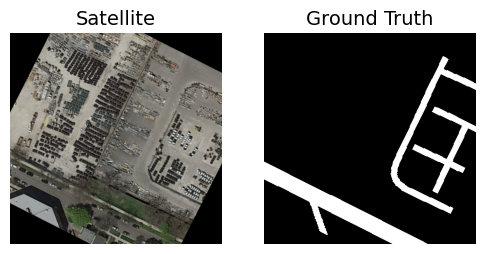

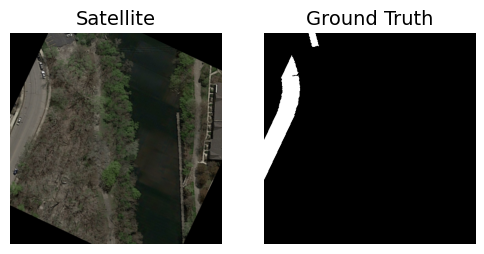

In [27]:
import cv2

transform = A.Compose([
    A.Resize(height=400, width=400, always_apply=True),
#    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),            # Must have
    A.VerticalFlip(p=0.5),              # Must have
    A.Rotate(p=0.5, limit=180, border_mode=cv2.BORDER_CONSTANT, rotate_method="ellipse"),
#    A.RandomBrightnessContrast(p=0.5),  # Maybe can simulate brightness during different times of day?
    A.RandomSnow(p=0.5),    # Good
])

# Get train and val dataset instances
train_dataset = RoadDataset(image_path_train, mask_path_train, transform)
valid_dataset = RoadDataset(image_path_test, mask_path_test, transform)

n_cpu = os.cpu_count()

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=n_cpu, persistent_workers=True)
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, num_workers=n_cpu, persistent_workers=True)

for i in range(2):
    img, mask = train_dataset[i]
    show_images(axis=False, satellite=img.transpose(1, 2, 0), ground_truth=mask.squeeze())